## 랜덤포레스트 회귀 모델

In [86]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pylab as plt
import pandas as pd

dataset = pd.read_csv('pre_train.csv', delimiter=',')
X_train, X_val, y_train, y_val = train_test_split(dataset.iloc[:,:-1], dataset.iloc[:,-1], test_size=0.2, random_state=1)

### 최적의 트래 갯수 구하기

In [75]:
"""n_estimators : The number of trees in the forest."""


parameters = [5*i for i in range(1, 11)]
tr_rmse = list()
val_rmse = list()
model = list()

for para in parameters:
    regressor = RandomForestRegressor(n_estimators=para, random_state=0)  
    regressor.fit(X_train, y_train)  
    tr_pred = regressor.predict(X_train)  
    val_pred = regressor.predict(X_val)  
    model.append(regressor)
    tr_rmse.append(np.sqrt(metrics.mean_squared_error(y_train, tr_pred)))
    val_rmse.append(np.sqrt(metrics.mean_squared_error(y_val, val_pred)))
    

### 트리 갯수가 15개 이상일 때부터 정확도가 비슷함
### n_estimators 는 15개로 설정

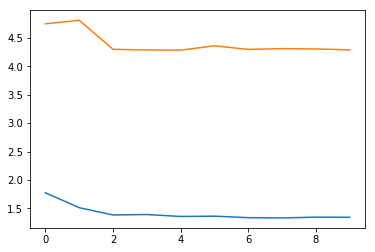

In [74]:
plt.plot(tr_rmse)
plt.plot(val_rmse)

### 결과 확인 및 test 예측값 저장
### test에 대한 MSE값은 4.54

In [81]:
testset = pd.read_csv('pre_test.csv', delimiter=',')
te_x = testset.iloc[:,:-1]
te_y = testset.iloc[:,-1]
te_pred = model[2].predict(te_x)  
print('Test_Dataset Mean_Squared_Error :', np.sqrt(metrics.mean_squared_error(te_y, te_pred)))  

Test_Dataset Mean_Squared_Error : 4.54791766275018


In [104]:
pd.DataFrame(te_pred, columns=['x']).to_csv('data/RandomForest.csv', index=False)

### 검증데이터의 오차에 대한 분산값 계산
### Ensenble에서 가중치로 이용

In [103]:
np.var(model[2].predict(X_val) - y_val)

18.47545246044419